In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df= pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Now let's do some data analysis

In [3]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [4]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [5]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [7]:
print(df['society'].value_counts())

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64


## By anaysing so far, I have decided to drop 'society' column 

In [8]:
df1= df.drop(['society'],axis='columns')
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data cleaning : Handling Null Values

In [9]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

## Let's deal the NA values in the following manner
###  1) Since location is having only 1 NA value , we can drop it directly
### 2) For size,bath and balcony, I will replace NA values with "Median"

In [10]:
df1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df1.dropna(subset=['location'])## drop na value in location column

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [12]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [13]:
df1['bath'].fillna(int(df1['bath'].median()),inplace=True)

In [14]:
df1['balcony'].fillna(int(df1['balcony'].median()),inplace=True)

In [15]:
df1.dropna(subset=['location'],inplace=True)## drop na value in location column

In [16]:
df1.isnull().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

## For size column will first check the unique values and then.... will do something

In [17]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## I will remove String part & retain only the number part from size column

In [18]:
df2= df1.dropna()

In [19]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
df2['size1']= df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\admin\AppData\Local\Temp\ipykernel_13136\3083676408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size1']= df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [21]:
df2

,area_type,availability,location,size,total_sqft,bath,balcony,price,size1
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [22]:
df2.describe()

,bath,balcony,price,size1
count,13303.000000,13303.000000,13303.000000,13303.000000
mean,2.689619,1.602872,112.584033,2.803728
std,1.339393,0.803455,148.993820,1.295022
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [23]:
df2.rename(columns = {'size1':'nbhk'}, inplace = True)
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_13136\503526429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'size1':'nbhk'}, inplace = True)


,area_type,availability,location,size,total_sqft,bath,balcony,price,nbhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
df2= df2.drop(['size'],axis='columns')
df2.head()

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [25]:
df2

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [26]:
def f1(z):
    try:
        float(z)
    except:
        return False
    return True

In [27]:
df2[~df2['total_sqft'].apply(f1)]

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2


## Let's work on total_sqft column

In [28]:
un= df2['total_sqft'].unique()

In [29]:
for i in un:
    print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

In [30]:
def handletotal_sqft(a):
    ans= a.split('-')
    if len(ans)==2:
        avg = (float(ans[0])+float(ans[1]))/2
        return avg
    try:
        return float(a)
    except:
        pass
    
    
        
        

In [31]:
df3= df2.copy()

In [32]:
df3.total_sqft= df3.total_sqft.apply(handletotal_sqft)

In [33]:
df3

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [34]:
uni= df3['total_sqft'].unique()

In [35]:
for i in uni:
    print(i)

1056.0
2600.0
1440.0
1521.0
1200.0
1170.0
2732.0
3300.0
1310.0
1020.0
1800.0
2785.0
1000.0
1100.0
2250.0
1175.0
1180.0
1540.0
2770.0
600.0
1755.0
2800.0
1767.0
510.0
1250.0
660.0
1610.0
1151.0
1025.0
2475.0
1075.0
1760.0
1693.0
1925.0
700.0
1070.0
1724.0
1290.0
1143.0
1296.0
1254.0
1330.74
970.0
1459.0
800.0
869.0
1270.0
1670.0
2010.0
1185.0
1600.0
3210.0
1500.0
1407.0
840.0
4395.0
845.0
5700.0
1160.0
3000.0
1140.0
1220.0
1350.0
1005.0
500.0
1358.0
1569.0
1240.0
2089.0
1206.0
1150.0
2511.0
460.0
4400.0
1660.0
3203.5
1326.0
1325.0
1499.0
1665.0
708.0
1060.0
710.0
1450.0
2894.0
1330.0
2502.0
650.0
2400.0
1007.0
966.0
1630.0
1640.0
782.0
1260.0
1413.0
1116.0
1530.0
3700.0
2497.0
1436.0
276.0
1427.0
2061.0
5611.5
2650.0
1282.0
1050.0
945.0
950.0
1870.0
880.0
1535.0
1360.0
1073.5
1280.0
5000.0
3050.0
1563.05
1167.0
4000.0
1828.0
890.0
1612.0
1034.0
1710.0
957.0
2795.0
1125.0
1735.0
2050.0
3750.0
1063.0
1904.0
4200.0
2000.0
1242.5
1425.0
1470.0
1300.0
450.0
1152.0
1550.0
400.0
705.0
770.0
12

## area_type,availabilty & location column

### Let's add price/sqft

In [36]:
df4 = df3.copy()

In [37]:
df4['price_per_sqft']= df3['price']*100000/df3['total_sqft']
df4.head()

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


## Let's explore location column

In [38]:
len(df4['location'].unique())

1304

In [39]:
stats= df4['price_per_sqft'].describe()
stats

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## location column is categorical and ML odel won't understand categorical columns.

In [40]:
df4.location= df4.location.apply(lambda x: x.strip())
location_st = df4['location'].value_counts(ascending= False)
location_st

Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [41]:
location_st.values.sum()

13303

In [42]:
len(location_st[location_st>10])

241

In [43]:
len(c

SyntaxError: unexpected EOF while parsing (1024268285.py, line 1)

## Dimensionality Reduction

### any location having less than 10 data points, will tagg it as 'other' location & then will do one hot encoding

In [44]:
location_st_less_than_10 = location_st[location_st<=10]
location_st_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [45]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_st_less_than_10 else x)
len(df4.location.unique())

242

In [46]:
df4.head()

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


## Let's deal with the outliers

In [47]:
df4[df4.total_sqft/df4.nbhk<300].head() # This are the outliers

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
9,Plot Area,Ready To Move,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500.0,3.0,2.0,100.0,3,20000.000000


## check above datapoints, We have 6 bhk apartment with 1020 sqft, also 8bhk in 600 sqft. So let's remve these datapoints

In [48]:
df5= df4[~(df4.total_sqft/df4.nbhk<300)]
df5

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,Ready To Move,other,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


## Now we have removed some outliers, but our data may contain more outliers, so let's deal with them using Standarad deviation & mean

In [49]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
def remove_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [51]:
df6= remove_outliers(df5)
df6

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10281,Super built-up Area,Ready To Move,other,1353.0,2.0,2.0,110.00,2,8130.081301
10282,Plot Area,18-Jan,other,812.0,1.0,0.0,26.00,1,3201.970443
10283,Super built-up Area,18-Jul,other,1440.0,2.0,2.0,63.93,3,4439.583333
10284,Super built-up Area,Ready To Move,other,1075.0,2.0,2.0,48.00,2,4465.116279


## Let's check if for a given location how does, the 2bhk and 3bhk property price looks like

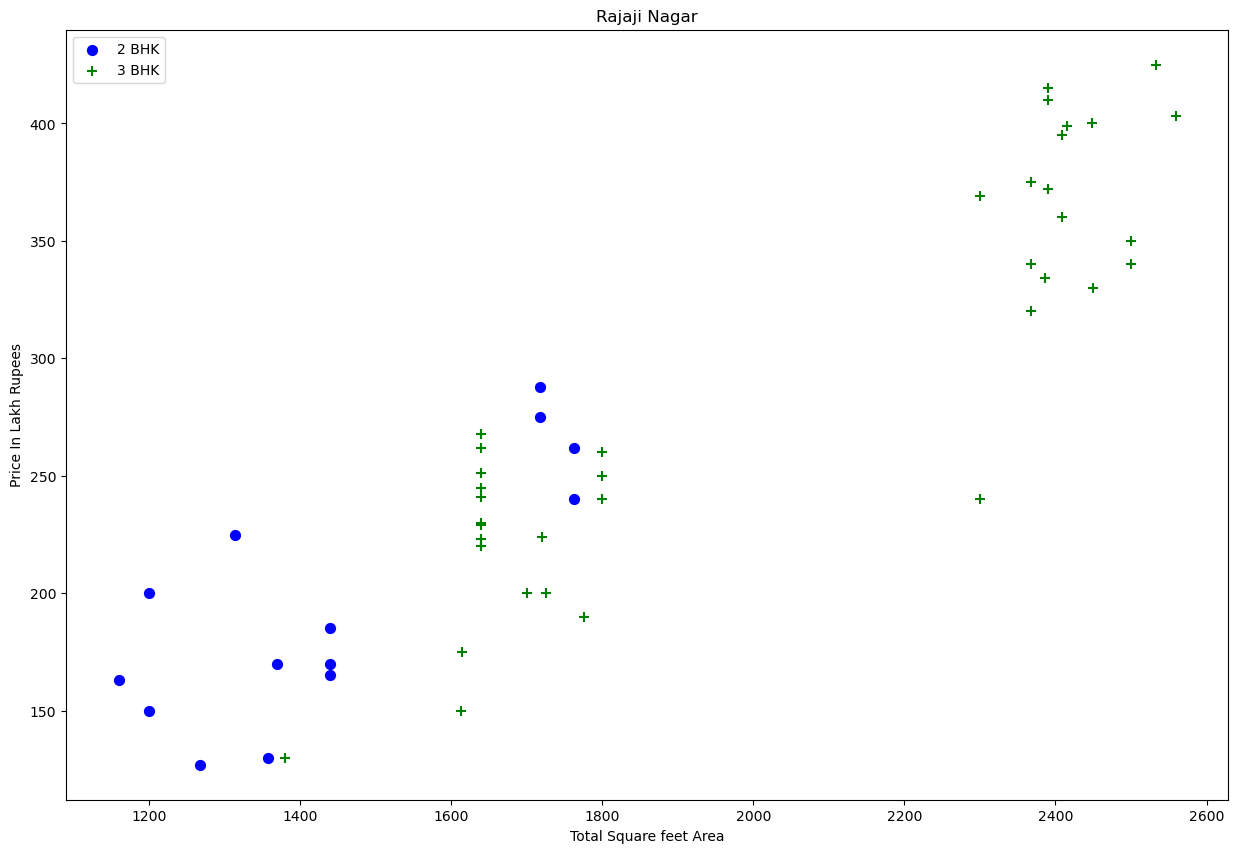

In [55]:
import matplotlib

def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.nbhk==2) ]
    bhk3= df[(df.location==location) & (df.nbhk==3) ]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price In Lakh Rupees')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,'Rajaji Nagar')

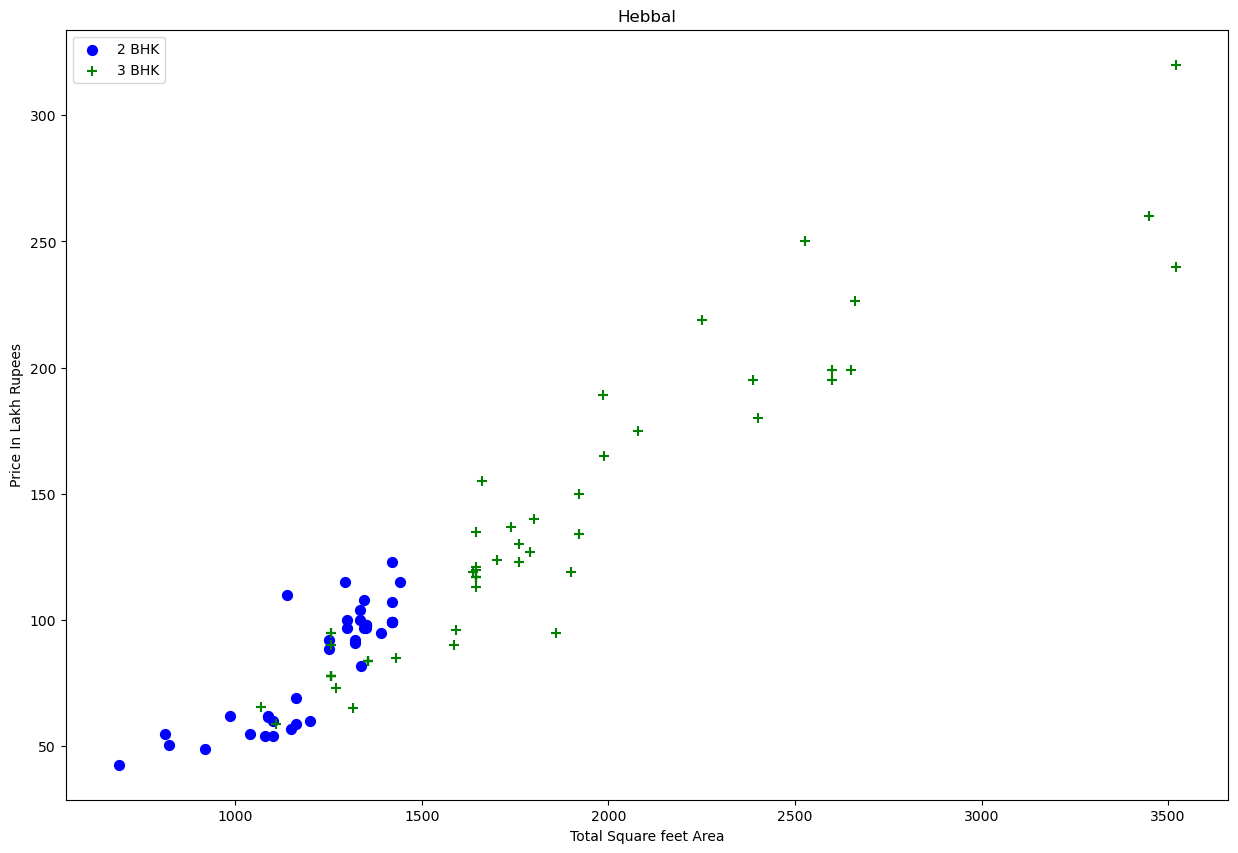

In [56]:
plot_scatter_chart(df6,'Hebbal')

## We should remove properties where for same location price of 3 BHk apartment is less 2BHK, for that we will build a dictionary of stats per bhk which will look like ths

In [57]:
"""{
    '1':{
        'mean':4000,
        'std':2000,
        'count':34
    },
    '2':{
        'mean':3000,
        'std':2200,
        'count':30
    }
}"""

"{\n    '1':{\n        'mean':4000,\n        'std':2000,\n        'count':34\n    },\n    '2':{\n        'mean':3000,\n        'std':2200,\n        'count':30\n    }\n}"

In [63]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('nbhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('nbhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7= remove_bhk_outliers(df6)

In [65]:
xyz= np.array([])
xyz

array([], dtype=float64)

In [66]:
practice_df1= df6.groupby('location')
practice_df1.head()

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...,...
7984,Super built-up Area,Ready To Move,other,2770.0,4.0,2.0,290.0,3,10469.314079
7985,Super built-up Area,Ready To Move,other,1100.0,2.0,2.0,48.0,2,4363.636364
7986,Super built-up Area,18-May,other,1250.0,3.0,2.0,56.0,3,4480.000000
7987,Super built-up Area,Ready To Move,other,600.0,1.0,0.0,38.0,1,6333.333333


In [67]:
for x,y in df6.groupby('location'):
    print(x)
    print(y)
    z= y.groupby('nbhk')
    print(z.head(5))

1st Block Jayanagar
              area_type   availability             location  total_sqft  bath  \
0  Super built-up  Area         20-May  1st Block Jayanagar      2850.0   4.0   
1  Super built-up  Area         18-Jun  1st Block Jayanagar      1630.0   3.0   
2  Super built-up  Area  Ready To Move  1st Block Jayanagar      1875.0   2.0   
3        Built-up  Area         15-Dec  1st Block Jayanagar      1200.0   2.0   
4  Super built-up  Area         18-Jun  1st Block Jayanagar      1235.0   2.0   
5  Super built-up  Area         20-May  1st Block Jayanagar      2750.0   4.0   
6  Super built-up  Area         20-May  1st Block Jayanagar      2450.0   4.0   

   balcony  price  nbhk  price_per_sqft  
0      1.0  428.0     4    15017.543860  
1      2.0  194.0     3    11901.840491  
2      3.0  235.0     3    12533.333333  
3      0.0  130.0     3    10833.333333  
4      2.0  148.0     2    11983.805668  
5      0.0  413.0     4    15018.181818  
6      2.0  368.0     4    15020.4081

                area_type   availability  location  total_sqft  bath  balcony  \
279  Super built-up  Area  Ready To Move  Abbigere       985.0   2.0      1.0   
280        Built-up  Area  Ready To Move  Abbigere      2200.0   6.0      2.0   
281  Super built-up  Area  Ready To Move  Abbigere       765.0   2.0      2.0   
282  Super built-up  Area         21-Dec  Abbigere       880.0   2.0      1.0   
283  Super built-up  Area  Ready To Move  Abbigere       795.0   2.0      1.0   
284  Super built-up  Area  Ready To Move  Abbigere      1005.0   2.0      1.0   
285  Super built-up  Area         18-Jun  Abbigere       734.0   1.0      0.0   
286  Super built-up  Area         17-Nov  Abbigere      1260.0   2.0      1.0   
287  Super built-up  Area  Ready To Move  Abbigere      1020.0   2.0      1.0   
289        Built-up  Area  Ready To Move  Abbigere      2500.0   6.0      0.0   
293        Built-up  Area  Ready To Move  Abbigere      3000.0   8.0      0.0   

      price  nbhk  price_pe

                area_type   availability  location  total_sqft  bath  balcony  \
533  Super built-up  Area  Ready To Move  Attibele       450.0   1.0      1.0   
534        Built-up  Area  Ready To Move  Attibele      1600.0   4.0      0.0   
535        Built-up  Area  Ready To Move  Attibele       656.0   2.0      1.0   
536        Built-up  Area  Ready To Move  Attibele       400.0   1.0      1.0   
537        Built-up  Area  Ready To Move  Attibele       400.0   1.0      1.0   
538        Built-up  Area  Ready To Move  Attibele       400.0   1.0      1.0   
539  Super built-up  Area  Ready To Move  Attibele       500.0   1.0      1.0   
540            Plot  Area  Ready To Move  Attibele      2168.0   4.0      2.0   
543  Super built-up  Area  Ready To Move  Attibele      1639.0   2.0      1.0   
545        Built-up  Area  Ready To Move  Attibele      1200.0   2.0      2.0   
547  Super built-up  Area  Ready To Move  Attibele       695.0   1.0      1.0   
548  Super built-up  Area  R

                area_type   availability      location  total_sqft  bath  \
813  Super built-up  Area         18-Jul  Bannerghatta      3012.0   6.0   
814  Super built-up  Area  Ready To Move  Bannerghatta      1665.0   3.0   
815  Super built-up  Area         18-Jul  Bannerghatta      2370.0   4.0   
816  Super built-up  Area         21-Dec  Bannerghatta      1100.0   2.0   
817  Super built-up  Area         18-Jul  Bannerghatta      2895.5   2.0   
818  Super built-up  Area         19-Dec  Bannerghatta      1113.0   2.0   
819  Super built-up  Area  Ready To Move  Bannerghatta      1200.0   2.0   
820  Super built-up  Area  Ready To Move  Bannerghatta      1070.0   2.0   
821  Super built-up  Area         19-Dec  Bannerghatta      1776.0   3.0   
822  Super built-up  Area         18-Jul  Bannerghatta      1776.0   3.0   

     balcony  price  nbhk  price_per_sqft  
813      2.0  250.0     4     8300.132802  
814      3.0  110.0     3     6606.606607  
815      2.0  195.0     3     8

                 area_type   availability   location  total_sqft  bath  \
1089  Super built-up  Area  Ready To Move  Bellandur      1767.0   3.0   
1090        Built-up  Area  Ready To Move  Bellandur      1205.0   2.0   
1091  Super built-up  Area  Ready To Move  Bellandur      1250.0   2.0   
1092  Super built-up  Area  Ready To Move  Bellandur      1000.0   2.0   
1093  Super built-up  Area  Ready To Move  Bellandur      1281.0   2.0   
...                    ...            ...        ...         ...   ...   
1172  Super built-up  Area         18-Aug  Bellandur      1260.0   2.0   
1173  Super built-up  Area  Ready To Move  Bellandur      1535.0   3.0   
1174  Super built-up  Area  Ready To Move  Bellandur      1047.0   2.0   
1175  Super built-up  Area  Ready To Move  Bellandur      1096.0   2.0   
1176  Super built-up  Area  Ready To Move  Bellandur      1262.0   2.0   

      balcony  price  nbhk  price_per_sqft  
1089      1.0  103.0     3     5829.088851  
1090      3.0   66.0 

                 area_type   availability     location  total_sqft  bath  \
1318  Super built-up  Area         18-Jun  Bommasandra      1260.0   3.0   
1319  Super built-up  Area  Ready To Move  Bommasandra      1200.0   3.0   
1320  Super built-up  Area         18-Jun  Bommasandra      1035.0   2.0   
1321  Super built-up  Area         18-May  Bommasandra      1035.0   2.0   
1322  Super built-up  Area  Ready To Move  Bommasandra      1034.0   2.0   
1323        Built-up  Area  Ready To Move  Bommasandra       877.0   2.0   
1324  Super built-up  Area         18-May  Bommasandra       920.0   2.0   
1325  Super built-up  Area         18-May  Bommasandra      1035.0   2.0   
1326  Super built-up  Area         18-May  Bommasandra      1295.0   2.0   
1327  Super built-up  Area  Ready To Move  Bommasandra      1478.0   2.0   
1328  Super built-up  Area         18-Jun  Bommasandra      1015.0   2.0   
1329        Built-up  Area  Ready To Move  Bommasandra      1000.0   2.0   
1330  Super 

                 area_type   availability    location  total_sqft  bath  \
1491  Super built-up  Area  Ready To Move  Chamrajpet      1475.0   2.0   
1492  Super built-up  Area  Ready To Move  Chamrajpet      1900.0   2.0   
1493  Super built-up  Area  Ready To Move  Chamrajpet      1350.0   2.0   
1494        Built-up  Area  Ready To Move  Chamrajpet      1050.0   2.0   
1495            Plot  Area  Ready To Move  Chamrajpet      1660.4   4.0   
1496        Built-up  Area  Ready To Move  Chamrajpet       505.0   1.0   
1497        Built-up  Area  Ready To Move  Chamrajpet      1565.0   3.0   
1498  Super built-up  Area  Ready To Move  Chamrajpet       730.0   1.0   
1499  Super built-up  Area  Ready To Move  Chamrajpet       650.0   1.0   
1500  Super built-up  Area  Ready To Move  Chamrajpet       650.0   2.0   
1501  Super built-up  Area  Ready To Move  Chamrajpet      1650.0   3.0   

      balcony   price  nbhk  price_per_sqft  
1491      2.0  120.00     3     8135.593220  
1492   

                 area_type   availability    location  total_sqft  bath  \
1720  Super built-up  Area         17-Sep  Dasanapura       708.0   2.0   
1721  Super built-up  Area  Ready To Move  Dasanapura       708.0   1.0   
1722        Built-up  Area  Ready To Move  Dasanapura       965.0   2.0   
1723  Super built-up  Area  Ready To Move  Dasanapura      1286.0   3.0   
1724  Super built-up  Area  Ready To Move  Dasanapura       814.0   2.0   
1725        Built-up  Area  Ready To Move  Dasanapura      1163.0   2.0   
1726  Super built-up  Area         18-May  Dasanapura      1286.0   2.0   
1728  Super built-up  Area  Ready To Move  Dasanapura       708.0   1.0   

      balcony  price  nbhk  price_per_sqft  
1720      2.0  37.00     2     5225.988701  
1721      1.0  40.00     2     5649.717514  
1722      1.0  42.50     2     4404.145078  
1723      2.0  61.44     3     4777.604977  
1724      1.0  42.00     2     5159.705160  
1725      1.0  65.00     2     5588.993981  
1726     

                 area_type   availability         location  total_sqft  bath  \
1905  Super built-up  Area  Ready To Move  Electronic City       660.0   1.0   
1906  Super built-up  Area  Ready To Move  Electronic City      1025.0   2.0   
1907  Super built-up  Area         18-Dec  Electronic City      1000.0   2.0   
1908  Super built-up  Area  Ready To Move  Electronic City      1530.0   2.0   
1909  Super built-up  Area  Ready To Move  Electronic City      1500.0   2.0   
1910        Built-up  Area  Ready To Move  Electronic City      1060.0   2.0   
1911  Super built-up  Area         18-Apr  Electronic City      1152.0   2.0   
1912  Super built-up  Area  Ready To Move  Electronic City      1350.0   2.0   
1913        Built-up  Area  Ready To Move  Electronic City       770.0   1.0   
1916  Super built-up  Area  Ready To Move  Electronic City       589.0   1.0   
1921  Super built-up  Area  Ready To Move  Electronic City      1800.0   3.0   
1922        Built-up  Area         18-Ap

                 area_type   availability location  total_sqft  bath  balcony  \
2513  Super built-up  Area         18-Apr   Gunjur      1140.0   2.0      3.0   
2514  Super built-up  Area  Ready To Move   Gunjur      1356.0   2.0      3.0   
2515        Built-up  Area  Ready To Move   Gunjur      1600.0   3.0      3.0   
2516            Plot  Area  Ready To Move   Gunjur      2000.0   3.0      0.0   
2517  Super built-up  Area         18-Aug   Gunjur      1140.0   2.0      2.0   
2518  Super built-up  Area  Ready To Move   Gunjur      1195.0   2.0      2.0   
2519        Built-up  Area  Ready To Move   Gunjur      1190.0   2.0      2.0   
2520        Built-up  Area         18-Mar   Gunjur      1457.0   2.0      3.0   
2521  Super built-up  Area  Ready To Move   Gunjur      1080.0   2.0      2.0   
2522  Super built-up  Area  Ready To Move   Gunjur      2132.0   3.0      3.0   
2523  Super built-up  Area  Ready To Move   Gunjur      1800.0   3.0      1.0   
2524  Super built-up  Area  

                 area_type   availability     location  total_sqft  bath  \
3039  Super built-up  Area  Ready To Move  Hennur Road      2089.0   3.0   
3040        Built-up  Area         18-Oct  Hennur Road      3203.5   2.0   
3041        Built-up  Area  Ready To Move  Hennur Road      5000.0   8.0   
3042  Super built-up  Area  Ready To Move  Hennur Road      1385.0   2.0   
3043  Super built-up  Area         18-Sep  Hennur Road      1317.5   2.0   
...                    ...            ...          ...         ...   ...   
3166  Super built-up  Area  Ready To Move  Hennur Road      1470.0   2.0   
3167  Super built-up  Area         19-Mar  Hennur Road      1165.0   2.0   
3168        Built-up  Area  Ready To Move  Hennur Road      1450.0   2.0   
3169  Super built-up  Area  Ready To Move  Hennur Road      1155.0   2.0   
3170  Super built-up  Area  Ready To Move  Hennur Road      1936.0   3.0   

      balcony   price  nbhk  price_per_sqft  
3039      2.0  140.00     3     6701.7711

                 area_type   availability location  total_sqft  bath  balcony  \
3389  Super built-up  Area  Ready To Move  Hoskote      1250.0   3.0      2.0   
3390  Super built-up  Area  Ready To Move  Hoskote      1225.0   3.0      1.0   
3391  Super built-up  Area  Ready To Move  Hoskote      1740.0   3.0      3.0   
3392  Super built-up  Area  Ready To Move  Hoskote      1170.0   2.0      3.0   
3393  Super built-up  Area  Ready To Move  Hoskote      1250.0   3.0      2.0   
3394            Plot  Area  Ready To Move  Hoskote      1200.0   3.0      2.0   
3395  Super built-up  Area  Ready To Move  Hoskote      1069.0   2.0      2.0   
3396  Super built-up  Area  Ready To Move  Hoskote      1095.0   2.0      2.0   
3397  Super built-up  Area  Ready To Move  Hoskote      1695.0   3.0      3.0   
3398        Built-up  Area  Ready To Move  Hoskote      1065.0   2.0      3.0   
3399  Super built-up  Area  Ready To Move  Hoskote      1395.0   2.0      2.0   
3400  Super built-up  Area  

                 area_type   availability   location  total_sqft  bath  \
3655  Super built-up  Area         18-May  Jalahalli      1400.0   3.0   
3656  Super built-up  Area  Ready To Move  Jalahalli      2250.0   3.0   
3657  Super built-up  Area  Ready To Move  Jalahalli      1694.0   2.0   
3658        Built-up  Area  Ready To Move  Jalahalli      1870.0   3.0   
3659        Built-up  Area  Ready To Move  Jalahalli      1400.0   1.0   
3660  Super built-up  Area  Ready To Move  Jalahalli      1045.0   2.0   
3661  Super built-up  Area  Ready To Move  Jalahalli      1615.0   3.0   
3662  Super built-up  Area  Ready To Move  Jalahalli      2113.0   3.0   
3663  Super built-up  Area  Ready To Move  Jalahalli      1932.0   4.0   
3664  Super built-up  Area         18-Dec  Jalahalli      1045.0   2.0   
3665            Plot  Area  Ready To Move  Jalahalli      1200.0   4.0   
3666  Super built-up  Area  Ready To Move  Jalahalli      1020.0   2.0   
3667  Super built-up  Area  Ready To M

                 area_type   availability         location  total_sqft  bath  \
3936  Super built-up  Area  Ready To Move  Kalena Agrahara      1200.0   2.0   
3937  Super built-up  Area  Ready To Move  Kalena Agrahara      1804.0   3.0   
3938  Super built-up  Area  Ready To Move  Kalena Agrahara      1425.0   2.0   
3939  Super built-up  Area  Ready To Move  Kalena Agrahara      1325.0   2.0   
3940  Super built-up  Area  Ready To Move  Kalena Agrahara      1450.0   2.0   
3941        Built-up  Area  Ready To Move  Kalena Agrahara       980.0   2.0   
3942  Super built-up  Area  Ready To Move  Kalena Agrahara      1187.0   2.0   
3943  Super built-up  Area  Ready To Move  Kalena Agrahara       800.0   2.0   
3944        Built-up  Area  Ready To Move  Kalena Agrahara      1565.0   3.0   
3945  Super built-up  Area  Ready To Move  Kalena Agrahara       610.0   1.0   
3947  Super built-up  Area  Ready To Move  Kalena Agrahara      1450.0   3.0   

      balcony  price  nbhk  price_per_s

                 area_type   availability       location  total_sqft  bath  \
4336        Built-up  Area  Ready To Move  Kasturi Nagar      1925.0   3.0   
4337  Super built-up  Area  Ready To Move  Kasturi Nagar      1567.0   2.0   
4338  Super built-up  Area  Ready To Move  Kasturi Nagar      1570.0   3.0   
4339  Super built-up  Area  Ready To Move  Kasturi Nagar      1565.0   3.0   
4340  Super built-up  Area  Ready To Move  Kasturi Nagar      1080.0   2.0   
4341  Super built-up  Area  Ready To Move  Kasturi Nagar      1101.0   2.0   
4342  Super built-up  Area  Ready To Move  Kasturi Nagar      1500.0   2.0   
4343  Super built-up  Area  Ready To Move  Kasturi Nagar      1896.0   3.0   
4344  Super built-up  Area  Ready To Move  Kasturi Nagar      1100.0   2.0   
4345  Super built-up  Area  Ready To Move  Kasturi Nagar      1570.0   3.0   
4346  Super built-up  Area  Ready To Move  Kasturi Nagar      1000.0   2.0   
4348  Super built-up  Area  Ready To Move  Kasturi Nagar      25

                 area_type   availability     location  total_sqft  bath  \
4561  Super built-up  Area  Ready To Move  Koramangala      1320.0   2.0   
4562  Super built-up  Area  Ready To Move  Koramangala      1253.0   2.0   
4563  Super built-up  Area  Ready To Move  Koramangala      1580.0   3.0   
4564  Super built-up  Area  Ready To Move  Koramangala      1750.0   3.0   
4565  Super built-up  Area  Ready To Move  Koramangala      3500.0   5.0   
4566  Super built-up  Area  Ready To Move  Koramangala      1005.0   1.0   
4567  Super built-up  Area  Ready To Move  Koramangala      2292.0   4.0   
4568  Super built-up  Area  Ready To Move  Koramangala      1835.0   2.0   
4569  Super built-up  Area  Ready To Move  Koramangala      1290.0   2.0   
4570  Super built-up  Area  Ready To Move  Koramangala      1300.0   2.0   
4571  Super built-up  Area  Ready To Move  Koramangala      2200.0   3.0   
4582  Super built-up  Area         19-Sep  Koramangala      2503.0   6.0   
4586  Super 

                 area_type   availability            location  total_sqft  \
4840  Super built-up  Area  Ready To Move  Lingadheeranahalli      1521.0   
4841  Super built-up  Area  Ready To Move  Lingadheeranahalli      1511.0   
4842  Super built-up  Area  Ready To Move  Lingadheeranahalli      1683.0   
4843  Super built-up  Area  Ready To Move  Lingadheeranahalli      1519.0   
4844  Super built-up  Area  Ready To Move  Lingadheeranahalli      1521.0   
4845  Super built-up  Area  Ready To Move  Lingadheeranahalli      1682.0   
4846  Super built-up  Area  Ready To Move  Lingadheeranahalli      1521.0   
4847  Super built-up  Area  Ready To Move  Lingadheeranahalli      1893.0   
4848  Super built-up  Area  Ready To Move  Lingadheeranahalli      1705.0   
4849  Super built-up  Area  Ready To Move  Lingadheeranahalli      2245.0   
4850  Super built-up  Area  Ready To Move  Lingadheeranahalli      1682.0   
4851  Super built-up  Area  Ready To Move  Lingadheeranahalli      1682.0   

                 area_type   availability       location  total_sqft  bath  \
5164        Built-up  Area  Ready To Move  Murugeshpalya      1296.0   2.0   
5165  Super built-up  Area  Ready To Move  Murugeshpalya      1550.0   3.0   
5166  Super built-up  Area  Ready To Move  Murugeshpalya      1845.0   3.0   
5167  Super built-up  Area  Ready To Move  Murugeshpalya      1185.0   2.0   
5168  Super built-up  Area         18-Aug  Murugeshpalya      1225.0   2.0   
5169  Super built-up  Area  Ready To Move  Murugeshpalya      1930.0   3.0   
5170  Super built-up  Area  Ready To Move  Murugeshpalya      1600.0   2.0   
5171  Super built-up  Area  Ready To Move  Murugeshpalya      1344.0   2.0   
5172  Super built-up  Area  Ready To Move  Murugeshpalya      1500.0   2.0   
5173  Super built-up  Area  Ready To Move  Murugeshpalya      1855.0   3.0   
5174  Super built-up  Area  Ready To Move  Murugeshpalya      1175.0   2.0   

      balcony  price  nbhk  price_per_sqft  
5164      2.0   81

Old Airport Road
                 area_type   availability          location  total_sqft  bath  \
5332  Super built-up  Area         18-May  Old Airport Road      2732.0   4.0   
5333        Built-up  Area  Ready To Move  Old Airport Road      1875.0   2.0   
5334  Super built-up  Area         18-Dec  Old Airport Road      3356.0   4.0   
5335  Super built-up  Area  Ready To Move  Old Airport Road      1206.0   2.0   
5336  Super built-up  Area         18-May  Old Airport Road      2774.0   4.0   
5337  Super built-up  Area         18-Dec  Old Airport Road      2690.0   4.0   
5338  Super built-up  Area         18-May  Old Airport Road      2690.0   4.0   
5339  Super built-up  Area         18-May  Old Airport Road      1655.0   2.0   
5340  Super built-up  Area  Ready To Move  Old Airport Road      1075.0   2.0   
5341        Built-up  Area  Ready To Move  Old Airport Road      1858.0   2.0   
5342  Super built-up  Area  Ready To Move  Old Airport Road      1150.0   2.0   
5343  Super

                 area_type   availability    location  total_sqft  bath  \
5526        Built-up  Area  Ready To Move  R.T. Nagar      1500.0   4.0   
5527            Plot  Area  Ready To Move  R.T. Nagar      1200.0   2.0   
5528  Super built-up  Area  Ready To Move  R.T. Nagar      1560.0   3.0   
5529  Super built-up  Area  Ready To Move  R.T. Nagar      1040.0   2.0   
5530  Super built-up  Area  Ready To Move  R.T. Nagar      1200.0   2.0   
5531  Super built-up  Area  Ready To Move  R.T. Nagar      1235.0   2.0   
5532            Plot  Area  Ready To Move  R.T. Nagar      1140.0   3.0   
5533  Super built-up  Area  Ready To Move  R.T. Nagar       970.0   2.0   
5534        Built-up  Area  Ready To Move  R.T. Nagar      1560.0   3.0   
5536        Built-up  Area  Ready To Move  R.T. Nagar      1680.0   3.0   
5537  Super built-up  Area  Ready To Move  R.T. Nagar      1400.0   2.0   
5541            Plot  Area  Ready To Move  R.T. Nagar      1500.0   4.0   
5542        Built-up  Are

                 area_type   availability       location  total_sqft  bath  \
5995  Super built-up  Area  Ready To Move  Sarakki Nagar      2121.0   4.0   
5996  Super built-up  Area         18-Dec  Sarakki Nagar      2289.0   3.0   
5997  Super built-up  Area  Ready To Move  Sarakki Nagar      2500.0   4.0   
5998  Super built-up  Area  Ready To Move  Sarakki Nagar      2145.0   4.0   
5999            Plot  Area  Ready To Move  Sarakki Nagar      1200.0   3.0   
6002  Super built-up  Area  Ready To Move  Sarakki Nagar      3131.0   4.0   
6003  Super built-up  Area  Ready To Move  Sarakki Nagar      3126.0   5.0   
6004  Super built-up  Area  Ready To Move  Sarakki Nagar      3124.0   6.0   

      balcony  price  nbhk  price_per_sqft  
5995      3.0  253.0     3    11928.335691  
5996      2.0  260.0     3    11358.671909  
5997      2.0  325.0     3    13000.000000  
5998      1.0  270.0     3    12587.412587  
5999      2.0  128.0     3    10666.666667  
6002      3.0  349.0     4 

                 area_type   availability location  total_sqft  bath  balcony  \
6475  Super built-up  Area  Ready To Move  Sompura       825.0   2.0      1.0   
6476        Built-up  Area  Ready To Move  Sompura      1025.0   2.0      0.0   
6477  Super built-up  Area  Ready To Move  Sompura      1020.0   2.0      3.0   
6478        Built-up  Area  Ready To Move  Sompura      1126.0   2.0      2.0   
6479        Built-up  Area  Ready To Move  Sompura       825.0   2.0      1.0   
6480  Super built-up  Area  Ready To Move  Sompura      1360.0   2.0      3.0   
6481  Super built-up  Area  Ready To Move  Sompura      1350.0   2.0      2.0   
6482  Super built-up  Area  Ready To Move  Sompura      2150.0   3.0      2.0   

      price  nbhk  price_per_sqft  
6475   33.0     2     4000.000000  
6476   37.0     3     3609.756098  
6477   41.0     2     4019.607843  
6478   39.0     2     3463.587922  
6479   32.0     2     3878.787879  
6480   45.0     3     3308.823529  
6481   47.0     3 

Thubarahalli
                 area_type   availability      location  total_sqft  bath  \
6809        Built-up  Area  Ready To Move  Thubarahalli      3800.0   4.0   
6810  Super built-up  Area  Ready To Move  Thubarahalli      1200.0   2.0   
6811  Super built-up  Area  Ready To Move  Thubarahalli      1128.0   2.0   
6812        Built-up  Area  Ready To Move  Thubarahalli      1185.0   2.0   
6813        Built-up  Area  Ready To Move  Thubarahalli       975.0   2.0   
6814  Super built-up  Area  Ready To Move  Thubarahalli      1330.0   2.0   
6815  Super built-up  Area  Ready To Move  Thubarahalli      1085.0   2.0   
6816        Built-up  Area  Ready To Move  Thubarahalli      1216.0   2.0   
6817  Super built-up  Area  Ready To Move  Thubarahalli      1200.0   2.0   
6818  Super built-up  Area  Ready To Move  Thubarahalli      1200.0   2.0   
6819  Super built-up  Area  Ready To Move  Thubarahalli      1200.0   2.0   
6820        Built-up  Area  Ready To Move  Thubarahalli      15

                 area_type   availability      location  total_sqft  bath  \
7094        Built-up  Area  Ready To Move  Vasanthapura      1022.0   2.0   
7095  Super built-up  Area  Ready To Move  Vasanthapura      1135.0   2.0   
7096  Super built-up  Area  Ready To Move  Vasanthapura       995.0   2.0   
7097  Super built-up  Area  Ready To Move  Vasanthapura       995.0   2.0   
7098  Super built-up  Area  Ready To Move  Vasanthapura      1037.0   2.0   

      balcony  price  nbhk  price_per_sqft  
7094      2.0  40.00     2     3913.894325  
7095      1.0  39.73     2     3500.440529  
7096      1.0  34.82     2     3499.497487  
7097      1.0  34.82     2     3499.497487  
7098      1.0  36.28     2     3498.553520  
Vidyaranyapura
                 area_type   availability        location  total_sqft  bath  \
7101            Plot  Area  Ready To Move  Vidyaranyapura      1440.0   2.0   
7102  Super built-up  Area  Ready To Move  Vidyaranyapura      1062.0   2.0   
7103        Bui

                 area_type   availability     location  total_sqft  bath  \
7904  Super built-up  Area  Ready To Move  Yelenahalli      1240.0   2.0   
7905        Built-up  Area  Ready To Move  Yelenahalli      1200.0   2.0   
7906        Built-up  Area  Ready To Move  Yelenahalli      1600.0   3.0   
7907  Super built-up  Area  Ready To Move  Yelenahalli      1260.0   2.0   
7908  Super built-up  Area  Ready To Move  Yelenahalli      1500.0   2.0   
7909  Super built-up  Area  Ready To Move  Yelenahalli      1175.0   2.0   
7910  Super built-up  Area  Ready To Move  Yelenahalli      1650.0   3.0   
7911  Super built-up  Area  Ready To Move  Yelenahalli      1200.0   2.0   

      balcony  price  nbhk  price_per_sqft  
7904      2.0  47.12     2     3800.000000  
7905      2.0  46.17     2     3847.500000  
7906      3.0  61.37     3     3835.625000  
7907      2.0  47.88     2     3800.000000  
7908      2.0  57.00     3     3800.000000  
7909      2.0  50.00     2     4255.319149  


In [64]:
df7

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10277,Carpet Area,19-Jan,other,1200.0,2.0,3.0,70.0,2,5833.333333
10278,Super built-up Area,Ready To Move,other,1800.0,1.0,1.0,200.0,1,11111.111111
10281,Super built-up Area,Ready To Move,other,1353.0,2.0,2.0,110.0,2,8130.081301
10282,Plot Area,18-Jan,other,812.0,1.0,0.0,26.0,1,3201.970443


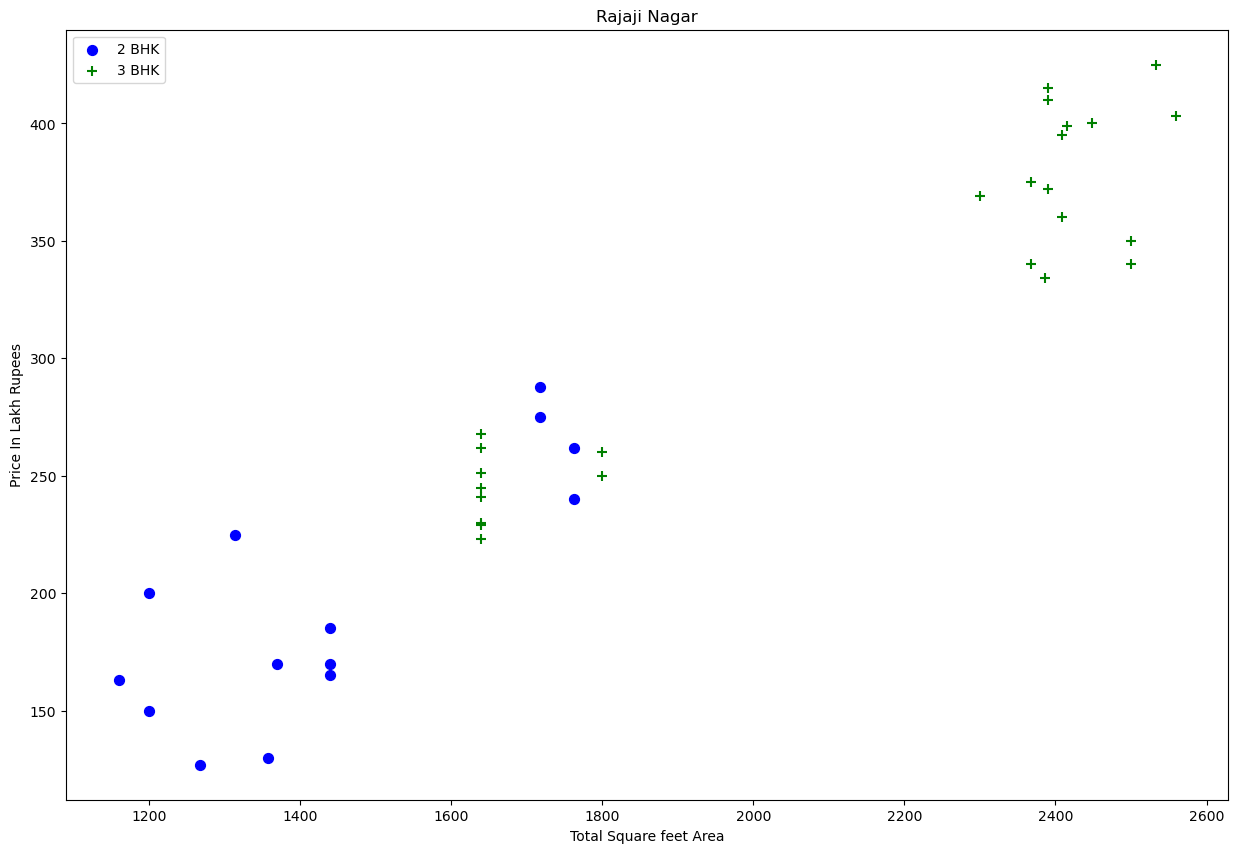

In [68]:
plot_scatter_chart(df7,"Rajaji Nagar")

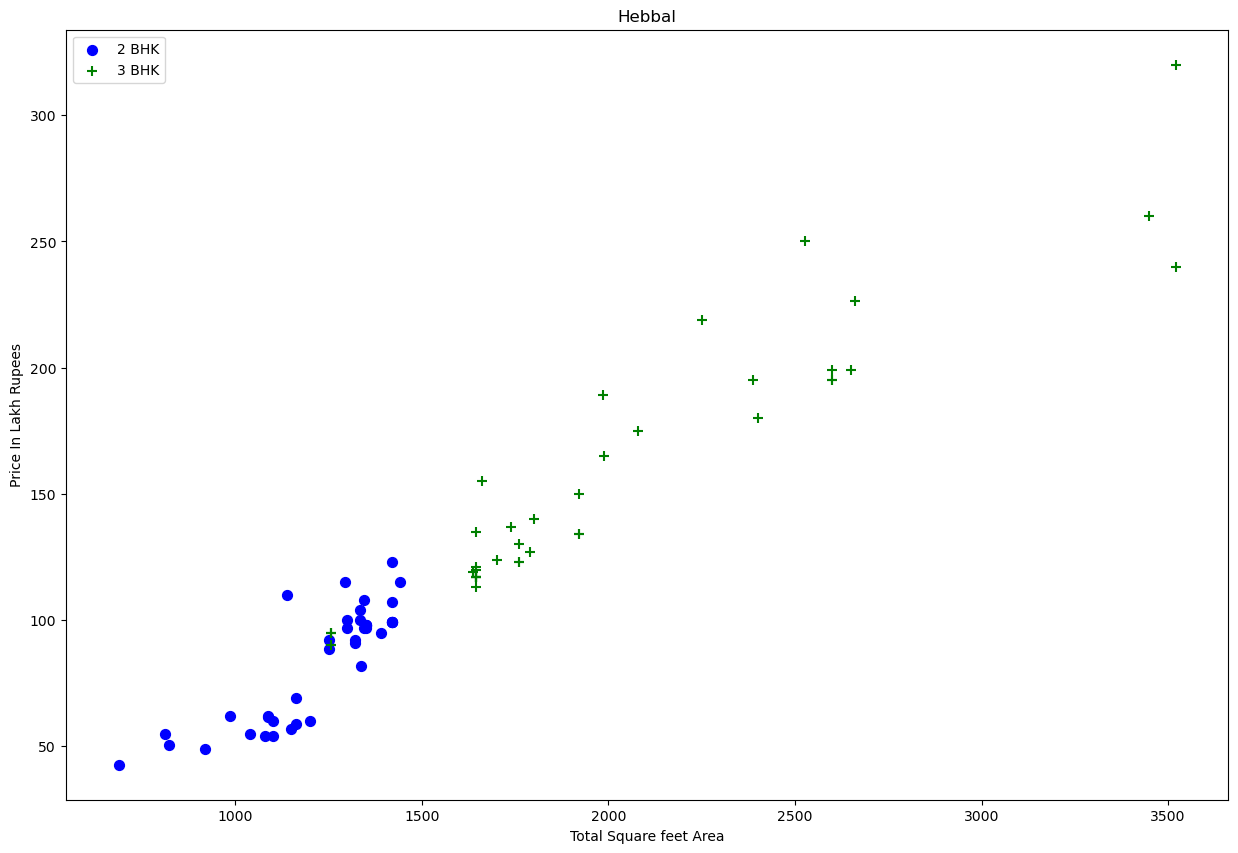

In [69]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

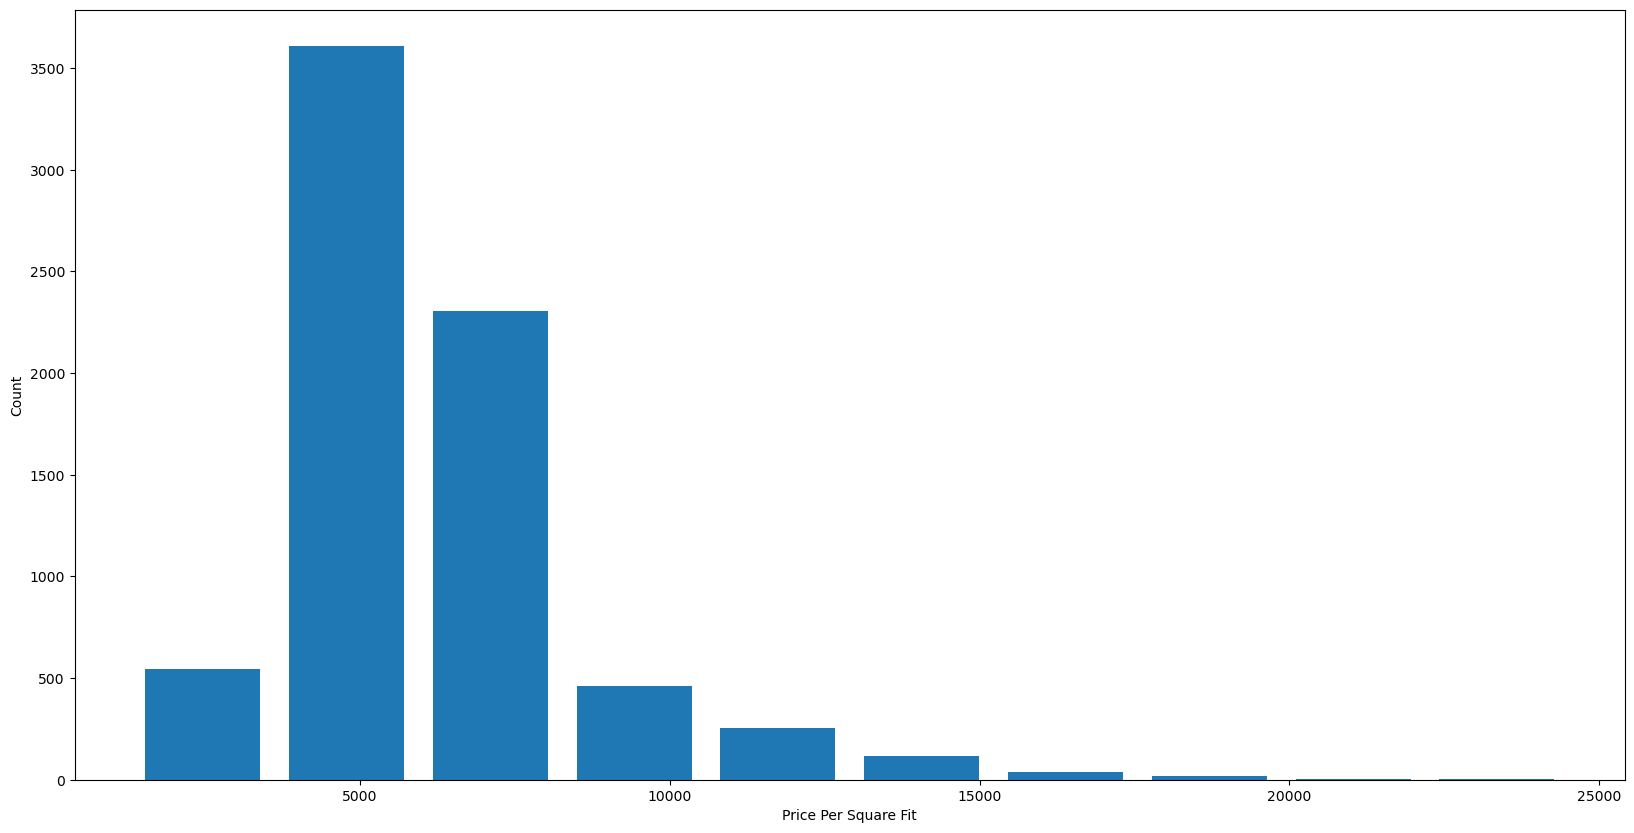

In [71]:
matplotlib.rcParams['figure.figsize']= (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Fit')
plt.ylabel('Count')

In [72]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

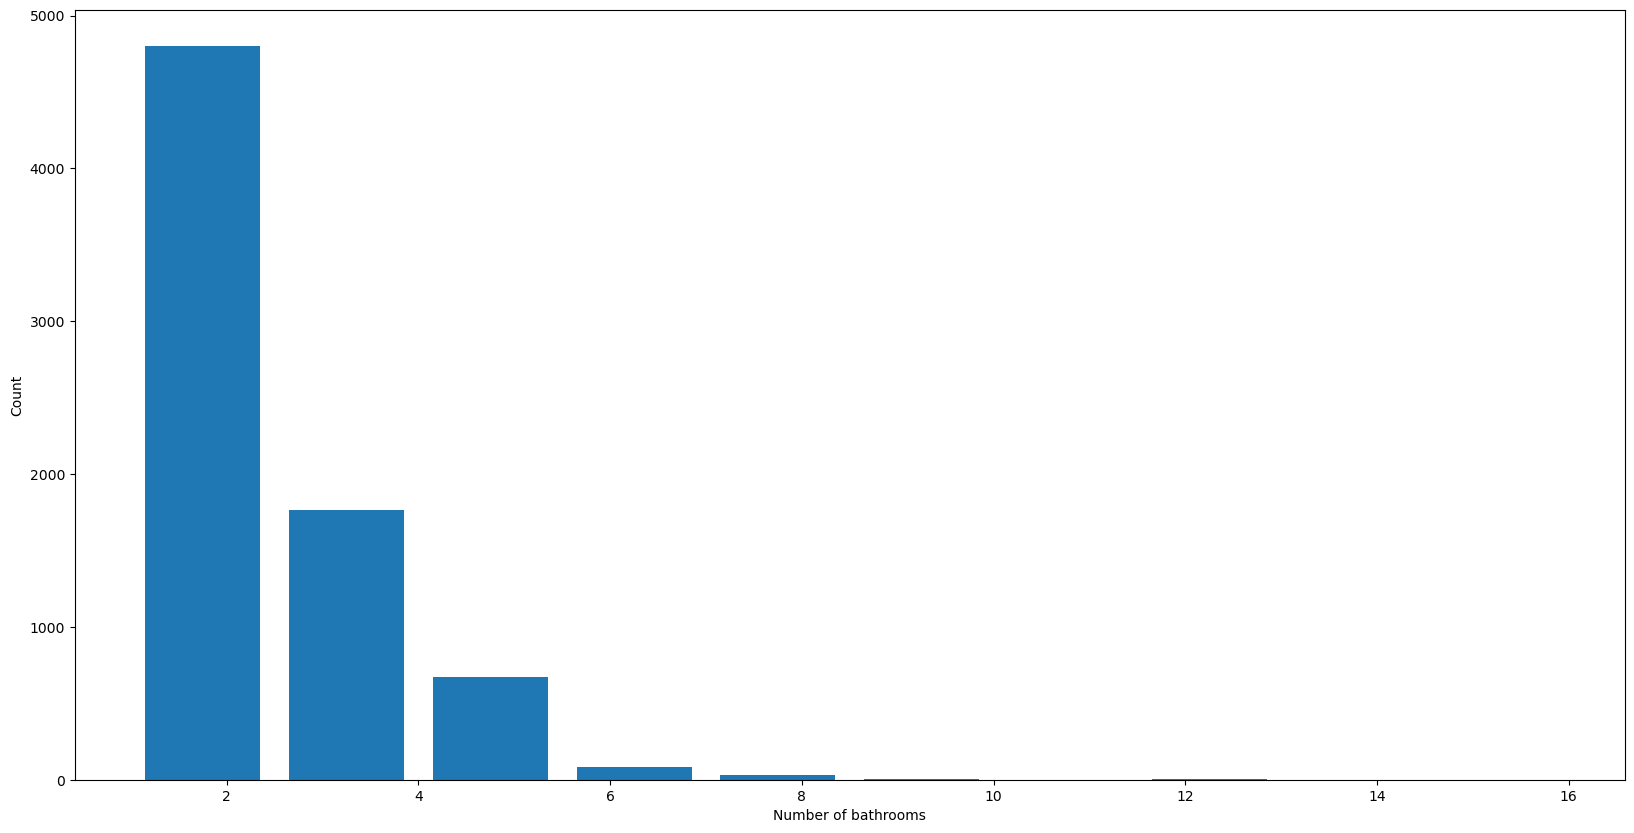

In [73]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

## Outliers tretment using no.of bathooms column

In [74]:
df7[df7.bath>10]

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
5306,Super built-up Area,Ready To Move,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8530,Super built-up Area,Ready To Move,other,12000.0,12.0,2.0,525.0,10,4375.000000
8619,Super built-up Area,Ready To Move,other,10000.0,16.0,2.0,550.0,16,5500.000000
9352,Super built-up Area,Ready To Move,other,6000.0,12.0,2.0,150.0,11,2500.000000
9683,Super built-up Area,Ready To Move,other,5425.0,13.0,0.0,275.0,13,5069.124424


## Its is unusual to have 2 more bathrooms than no. of bedrooms in a home

In [76]:
df7[df7.bath>df7.nbhk+2]

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
1634,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Built-up Area,Ready To Move,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Super built-up Area,Ready To Move,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8455,Super built-up Area,Ready To Move,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [78]:
df8= df7[(df7.bath<df7.nbhk+2)]
df8

,area_type,availability,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10277,Carpet Area,19-Jan,other,1200.0,2.0,3.0,70.0,2,5833.333333
10278,Super built-up Area,Ready To Move,other,1800.0,1.0,1.0,200.0,1,11111.111111
10281,Super built-up Area,Ready To Move,other,1353.0,2.0,2.0,110.0,2,8130.081301
10282,Plot Area,18-Jan,other,812.0,1.0,0.0,26.0,1,3201.970443


In [81]:
df8 =df8.drop(['availability'],axis='columns')

In [82]:
df8

,area_type,location,total_sqft,bath,balcony,price,nbhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10277,Carpet Area,other,1200.0,2.0,3.0,70.0,2,5833.333333
10278,Super built-up Area,other,1800.0,1.0,1.0,200.0,1,11111.111111
10281,Super built-up Area,other,1353.0,2.0,2.0,110.0,2,8130.081301
10282,Plot Area,other,812.0,1.0,0.0,26.0,1,3201.970443


In [83]:
df8 =df8.drop(['price_per_sqft'],axis='columns')

In [84]:
df8

,area_type,location,total_sqft,bath,balcony,price,nbhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...,...
10277,Carpet Area,other,1200.0,2.0,3.0,70.0,2
10278,Super built-up Area,other,1800.0,1.0,1.0,200.0,1
10281,Super built-up Area,other,1353.0,2.0,2.0,110.0,2
10282,Plot Area,other,812.0,1.0,0.0,26.0,1


## let's do one hot encoding for area-type & location column

In [85]:
dummies= pd.get_dummies(df8,drop_first= True)
dummies.head()

,total_sqft,bath,balcony,price,nbhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
dummies.to_csv('final_csv')

In [87]:
df9= dummies.copy()
df9

,total_sqft,bath,balcony,price,nbhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,1200.0,2.0,3.0,70.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,1800.0,1.0,1.0,200.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,1353.0,2.0,2.0,110.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,812.0,1.0,0.0,26.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
X= df9.drop(['price'],axis= 'columns')

In [90]:
X

,total_sqft,bath,balcony,nbhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,1200.0,2.0,3.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,1800.0,1.0,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,1353.0,2.0,2.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,812.0,1.0,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
y= df9.price

In [92]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10277     70.0
10278    200.0
10281    110.0
10282     26.0
10285    400.0
Name: price, Length: 7275, dtype: float64